In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from DLMSimulator import DLM
from utils import *

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


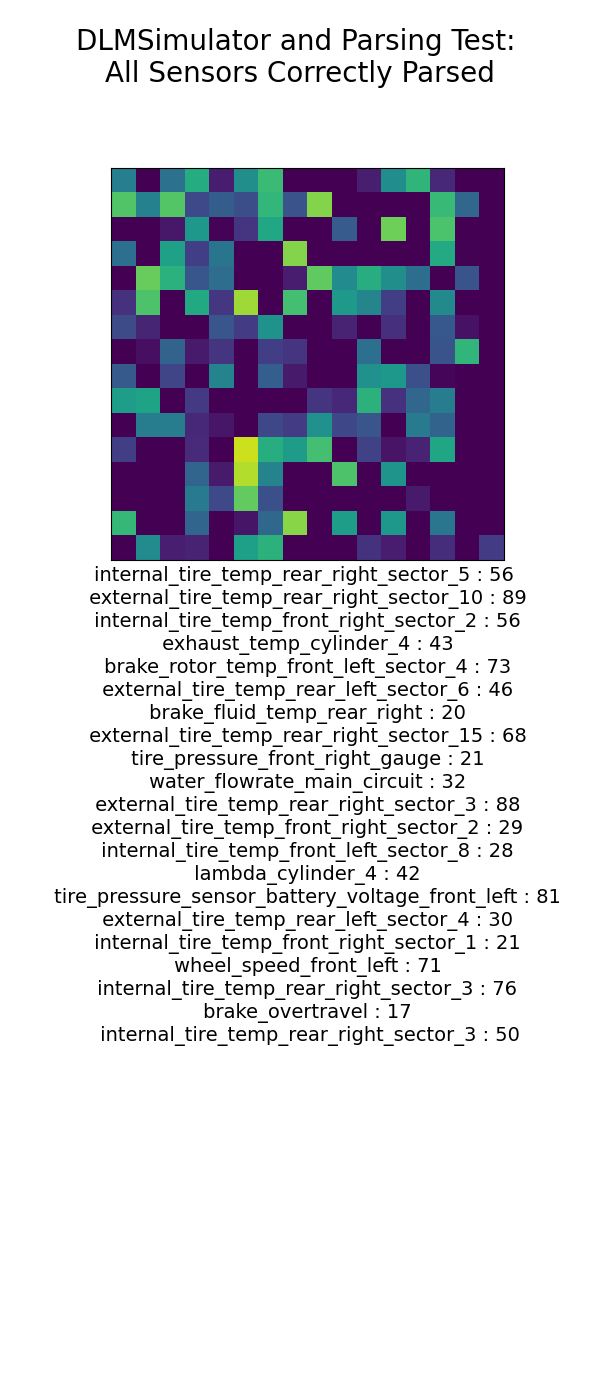

KeyboardInterrupt: 

In [8]:
data = np.empty((16,16))
data[:,:] = np.nan
ptlist = [(x,y,0) for x in range(16) for y in range(16)]
ptlist = np.array(ptlist)
ptlist[233:][:,2] = 0
ptlist[-1][2] = 100
data[ptlist[:,1].astype('int'), ptlist[:,0].astype('int')] = ptlist[:,2]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
im = ax.imshow(data)
plt.show(block=False)
fig.show()
fig.canvas.draw()
fig.suptitle('DLMSimulator and Parsing Test: \nAll Sensors Correctly Parsed', fontsize=20)
plt.xlabel('', fontsize=18)
plt.ylabel('', fontsize=16)
plt.xticks([])
plt.yticks([])
plt.rcParams['figure.figsize'] = [6, 14]
plt.subplots_adjust(bottom=0.6)

d = DLM()
names = []
for iterat in range(100000):
    if len(names) > 20:
        names.remove(names[-1])
    d.run()
    pkt = parse_packet(d.packet)
    for k,v in pkt.items():
        name = k
        resp = v
        break
    names.insert(0,f'{name} : {str(resp)}')
    id_ = d.sensors_dict[name]['id']
    x = (id_-1)%16
    y = (id_-1)//16
    data[x][y] = resp
    im.set_array(data)
    fig.show()
    fig.canvas.draw()
    val = random.randint(0,10)
    if iterat > 250:
        plt.xlabel(' \n '.join(names), fontsize=14)
    for i,x in enumerate(data):
        for j,y in enumerate(x):
            data[i][j] = y - 0.2
    time.sleep(0.016666)